<a href="https://colab.research.google.com/github/lingliao/cfdna-wgs/blob/master/LL_sld_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("carData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(ggplot2)


In [8]:
data(Salaries, package="carData")

In [140]:
 readfile <- read.csv("/content/sld_version3.csv")

In [ ]:
readfile

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


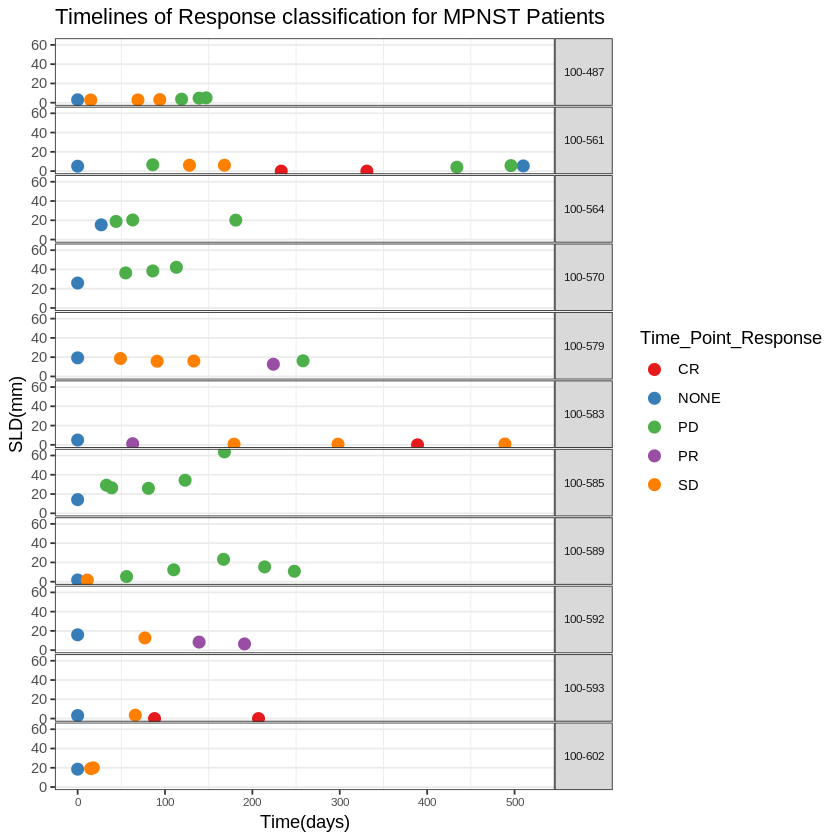

In [154]:
# calculate means and standard erroes by sex,
# rank and discipline

library(dplyr)
plotdata <- readfile %>%
  group_by(patient.ID)

# create better labels for discipline

# create plot
ggplot(plotdata, 
       aes(x = Baseline, 
           y = SLD,
           color = Time_Point_Response)) +
  geom_point(size = 3) +

  scale_x_continuous(limits = c(-0, 520)) +
  facet_grid(patient.ID ~.,switch = "x",labeller = label_wrap_gen(20)) +
  theme_bw() +
  theme(#panel.spacing.x=unit(0.2, "lines"),
        axis.text.x=element_text(size=7,angle = 0),
        #panel.spacing.x = unit(2, "lines"),
        strip.text.y = element_text(size = 7, angle = 0),
        panel.spacing = unit(0.2, "mm"),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank()) +
  labs(y="SLD(mm)", 
       x="Time(days)", 
       title="Timelines of Response classification for MPNST Patients",
       subtitle = "(Patient)") +
  scale_color_brewer(palette="Set1")
ggsave(file="sld.pdf", width=6, height=6, dpi=1000)
#print (plotdata)

`summarise()` has grouped output by 'sex', 'rank'. You can override using the
`.groups` argument.


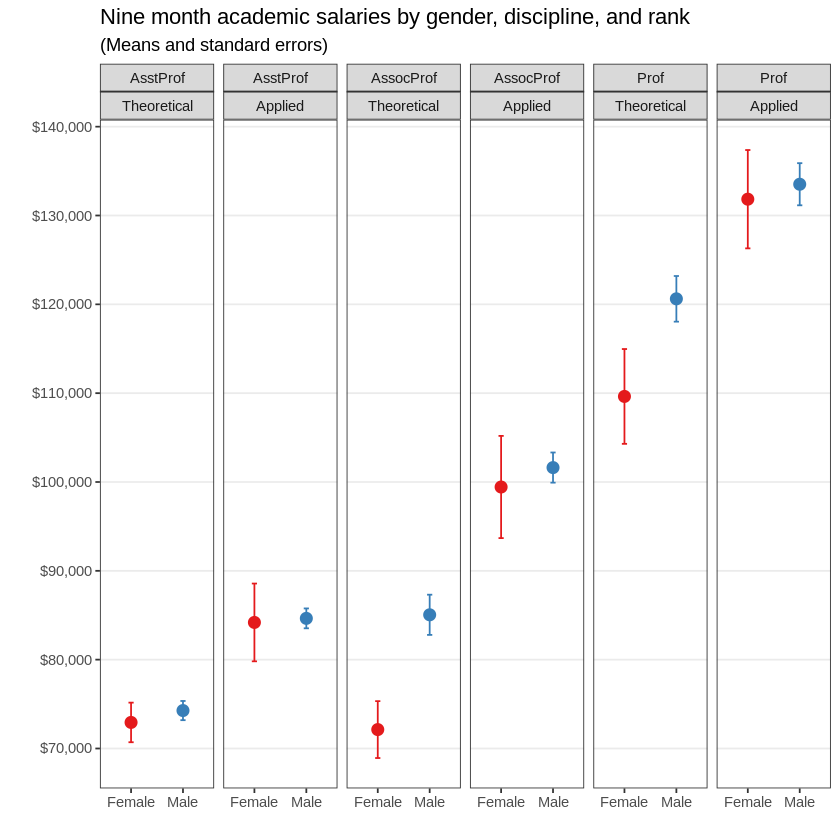

In [29]:
# calculate means and standard erroes by sex,
# rank and discipline

library(dplyr)
plotdata <- Salaries %>%
  group_by(sex, rank, discipline) %>%
  summarize(n = n(),
            mean = mean(salary),
            sd = sd(salary),
            se = sd / sqrt(n))

# create better labels for discipline
plotdata$discipline <- factor(plotdata$discipline,
                              labels = c("Theoretical",
                                         "Applied"))
# create plot
ggplot(plotdata, 
       aes(x = sex, 
           y = mean,
           color = sex)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean - se, 
                    ymax = mean + se),
                width = .1) +
  scale_y_continuous(breaks = seq(70000, 140000, 10000),
                     label = scales::dollar) +
  facet_grid(. ~ rank + discipline) +
  theme_bw() +
  theme(legend.position = "none",
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank()) +
  labs(x="", 
       y="", 
       title="Nine month academic salaries by gender, discipline, and rank",
       subtitle = "(Means and standard errors)") +
  scale_color_brewer(palette="Set1")

In [9]:
Salaries

rank,discipline,yrs.since.phd,yrs.service,sex,salary
<fct>,<fct>,<int>,<int>,<fct>,<int>
Prof,B,19,18,Male,139750
Prof,B,20,16,Male,173200
AsstProf,B,4,3,Male,79750
Prof,B,45,39,Male,115000
Prof,B,40,41,Male,141500
AssocProf,B,6,6,Male,97000
Prof,B,30,23,Male,175000
Prof,B,45,45,Male,147765
Prof,B,21,20,Male,119250
